In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

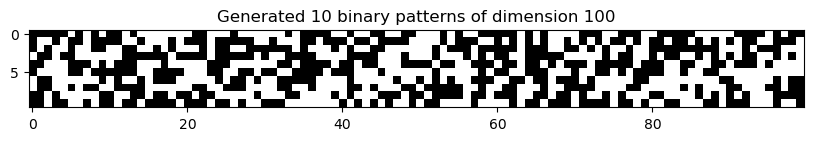

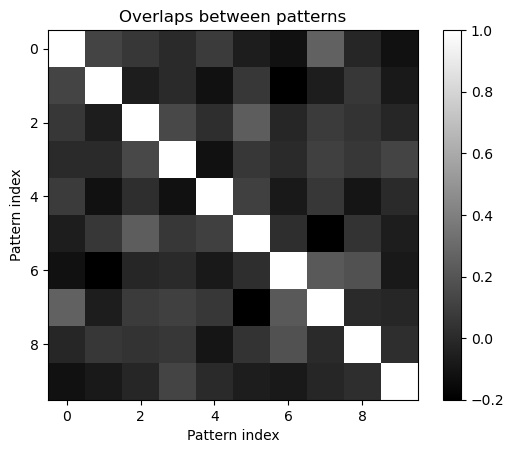

In [2]:
patterns = utils.get_n_binary_patterns(n_patterns=10, pattern_dim=100, plot=True, check_overlaps=True)